In [3]:
!pip install sec-api

In [4]:
from sec_api import ExtractorApi # https://pypi.org/project/sec-api/
# get API from sec-api.io
extractorApi = ExtractorApi("f8d767868373a8f436bdf3f4eace60095f689a92deb67a896f45895d15a0e497")


# Apple 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/aapl-20230930.htm"

# get the standardized and cleaned text of section 1A "Risk Factors"
section_text = extractorApi.get_section(filing_url, "1A", "text")

# get the original HTML of section 7 
# "Management’s Discussion and Analysis of Financial Condition and Results of Operations"
section_html = extractorApi.get_section(filing_url, "7", "html")
print (section_text)

 Item 1A. Risk Factors 

The Company&#8217;s business, reputation, results of operations, financial condition and stock price can be affected by a number of factors, whether currently known or unknown, including those described below. When any one or more of these risks materialize from time to time, the Company&#8217;s business, reputation, results of operations, financial condition and stock price can be materially and adversely affected. 

Because of the following factors, as well as other factors affecting the Company&#8217;s results of operations and financial condition, past financial performance should not be considered to be a reliable indicator of future performance, and investors should not use historical trends to anticipate results or trends in future periods. This discussion of risk factors contains forward-looking statements. 

This section should be read in conjunction with Part II, Item 7, &#8220;Management&#8217;s Discussion and Analysis of Financial Condition and Resu

In [5]:
!pip install wordcloud

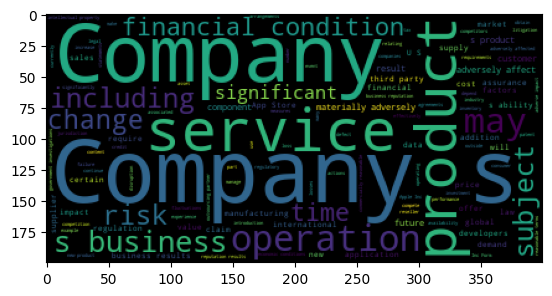

In [6]:
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

wc = WordCloud().generate(section_text)
plt.imshow(wc)

In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
# import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# if you don't have vadar_lexicon data, you can run the following command in a terminal window:
#python -m nltk.downloader vader_lexicon
nltk.download('vader_lexicon')

# download nltk corpus (first time only)
nltk.download('all')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\narji\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\narji\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\narji\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\narji\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\narji\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nl

True

In [9]:
#Create a Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()
#Analyze section_text
scores = analyzer.polarity_scores(section_text)

print(scores)
#the compound key is a normalized score that ranges from -1(most negative) to 1(most positive)

{'neg': 0.094, 'neu': 0.818, 'pos': 0.087, 'compound': -0.9938}


In [10]:
#We can also check which score is the highest and use that to classify the text as positive, negative, or neutral.
if scores['compound'] >= 0.5:
    print("Positive")
elif scores['compound'] >-0.5:
    print("Neutral")
else:
    print("Negative")

Negative


In [11]:
!pip install transformers

# FinBERT

In [12]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("f8d767868373a8f436bdf3f4eace60095f689a92deb67a896f45895d15a0e497")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1318605/000162828025003063/tsla-20241231.htm"


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

C:\Users\narji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 ITEM 7. MANAGEMENT&#8217;S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS 

The following discussion and analysis should be read in conjunction with the consolidated financial statements and the related notes included elsewhere in this Annual Report on Form 10-K. For further discussion of our products and services, technology and competitive strengths, refer to Item 1- Business. For discussion related to changes in financial condition and the results of operations for fiscal year 2023-related items, refer to Part II, Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations in our Annual Report on Form 10-K for fiscal year 2023, which was filed with the Securities and Exchange Commission on January 29, 2024. 

Overview and 2024 Highlights 

Our mission is to accelerate the world&#8217;s transition to sustainable energy. We design, develop, manufacture, lease and sell high-performance fully electric vehicles, solar ene

In [13]:
!pip install tensorflow
!pip install tensorflow-gpu
!pip install torch

  Using cached protobuf-4.25.6-cp39-cp39-win_amd64.whl.metadata (541 bytes)
  Using cached tensorboard-2.13.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Using cached protobuf-4.25.6-cp39-cp39-win_amd64.whl (413 kB)
Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Uninstalling tensorflow-estimator-2.10.0:
      Successful

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.10.1 requires keras<2.11,>=2.10.0, but you have keras 2.13.1 which is incompatible.
tensorflow-gpu 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.6 which is incompatible.
tensorflow-gpu 2.10.1 requires tensorboard<2.11,>=2.10, but you have tensorboard 2.13.0 which is incompatible.
tensorflow-gpu 2.10.1 requires tensorflow-estimator<2.11,>=2.10.0, but you have tensorflow-estimator 2.13.0 which is incompatible.
tf-nightly 2.20.0.dev20250331 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.


  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl.metadata (807 bytes)
  Using cached tensorboard-2.10.1-py3-none-any.whl.metadata (1.9 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl.metadata (1.1 kB)
Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tb-nightly 2.19.0a20250218 requires tensorboard-data-server<0.8.0,>=0.7.0, but you have tensorboard-data-server 0.6.1 which is incompatible.
tensorflow-intel 2.13.1 requires keras<2.14,>=2.13.1, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.13.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.13.1 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.13.1 requires tensorflow-estimator<2.14,>=2.13.0, but you have tensorflow-estimator 2.10.0 which is incompatible.
tf-nightly 2.20.0.dev20250331 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
tf-nightly 2.20.0.dev20250331 requires protobuf<6.0.0dev,>

   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 1.0/204.1 MB 6.3 MB/s eta 0:00:33
    --------------------------------------- 2.6/204.1 MB 6.6 MB/s eta 0:00:31
   - -------------------------------------- 5.2/204.1 MB 8.9 MB/s eta 0:00:23
   - -------------------------------------- 7.3/204.1 MB 9.3 MB/s eta 0:00:22
   -- ------------------------------------- 10.2/204.1 MB 10.1 MB/s eta 0:00:20
   -- ------------------------------------- 14.2/204.1 MB 11.7 MB/s eta 0:00:17
   --- ------------------------------------ 17.3/204.1 MB 12.1 MB/s eta 0:00:16
   --- ------------------------------------ 19.7/204.1 MB 12.1 MB/s eta 0:00:16
   ---- ----------------------------------- 22.5/204.1 MB 12.3 MB/s eta 0:00:15
   ----- ---------------------------------- 26.2/204.1 MB 12.7 MB/s eta 0:00:15
   ----- ---------------------------------- 29.1/204.1 MB 12.7 MB/s eta 0:00:14
   ------ --------------------------------- 32.0/204.1 MB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.1 requires keras<2.14,>=2.13.1, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.13.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.13.1 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.13.1 requires tensorflow-estimator<2.14,>=2.13.0, but you have tensorflow-estimator 2.10.0 which is incompatible.
tensorflow-intel 2.13.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.13.1 which is incompatible.
tf-nightly 2.20.0.dev20250331 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
tf-nightly 2.20.0.dev20250331 requires protobuf<6.0.0dev,>=4.21.6, but y

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use 0


Sentiment Distribution: {'negative': 57.38, 'positive': 25.41, 'neutral': 17.21}


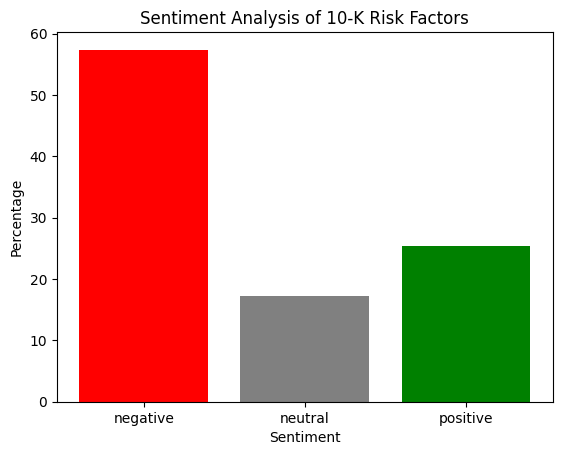

In [14]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += f"{sentence}. "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = f"{sentence}. "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Explicitly order the sentiments and assign colors
    ordered_labels = ["negative", "neutral", "positive"]
    ordered_values = [percentage.get(label, 0) for label in ordered_labels]
    ordered_colors = ["red", "gray", "green"]  # red for negative, gray for neutral, green for positive

    # Plot sentiment results
    plt.bar(ordered_labels, ordered_values, color=ordered_colors)
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 7 not found.")

# FinBERT Airbnb 2024

In [15]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("f8d767868373a8f436bdf3f4eace60095f689a92deb67a896f45895d15a0e497")  # Replace with your actual API key

# URL of the 10-K filing 2024
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972025000010/abnb-20241231.htm"


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included in Item 8 of this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2024 refer to the year ended December 31, 2024, references to 2023 refer to the year ended December 31, 2023, and 

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use 0


Sentiment Distribution: {'neutral': 50.0, 'positive': 43.52, 'negative': 6.48}


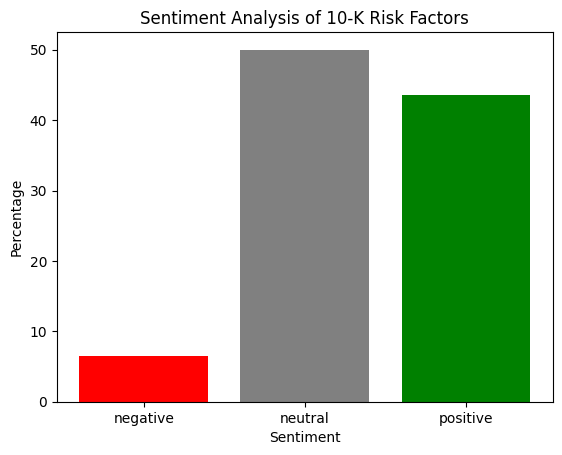

In [16]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += f"{sentence}. "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = f"{sentence}. "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Explicitly order the sentiments and assign colors
    ordered_labels = ["negative", "neutral", "positive"]
    ordered_values = [percentage.get(label, 0) for label in ordered_labels]
    ordered_colors = ["red", "gray", "green"]  # red for negative, gray for neutral, green for positive

    # Plot sentiment results
    plt.bar(ordered_labels, ordered_values, color=ordered_colors)
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 7 not found.")

# FinBERT Airbnb 2023

In [17]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("f8d767868373a8f436bdf3f4eace60095f689a92deb67a896f45895d15a0e497")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972024000006/abnb-20231231.htm"


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included in Item 8 of this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2023 refer to the year ended December 31, 2023, references to 2022 refer to the year ended December 31, 2022, and 

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use 0


Sentiment Distribution: {'neutral': 69.91, 'positive': 21.24, 'negative': 8.85}


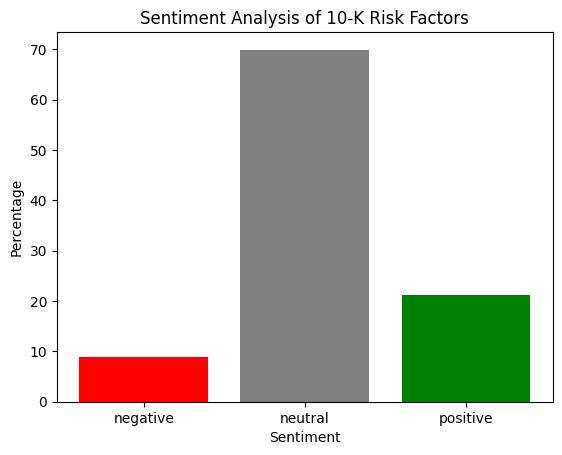

In [18]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += f"{sentence}. "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = f"{sentence}. "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Explicitly order the sentiments and assign colors
    ordered_labels = ["negative", "neutral", "positive"]
    ordered_values = [percentage.get(label, 0) for label in ordered_labels]
    ordered_colors = ["red", "gray", "green"]  # red for negative, gray for neutral, green for positive

    # Plot sentiment results
    plt.bar(ordered_labels, ordered_values, color=ordered_colors)
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 7 not found.")

# FinBERT Airbnb 2022

In [19]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("f8d767868373a8f436bdf3f4eace60095f689a92deb67a896f45895d15a0e497")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972023000003/abnb-20221231.htm"


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included elsewhere in this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2022 refer to the year ended December 31, 2022, references to 2021 refer to the year ended December 31, 2021, and 

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use 0


Sentiment Distribution: {'negative': 70.07, 'positive': 21.17, 'neutral': 8.76}


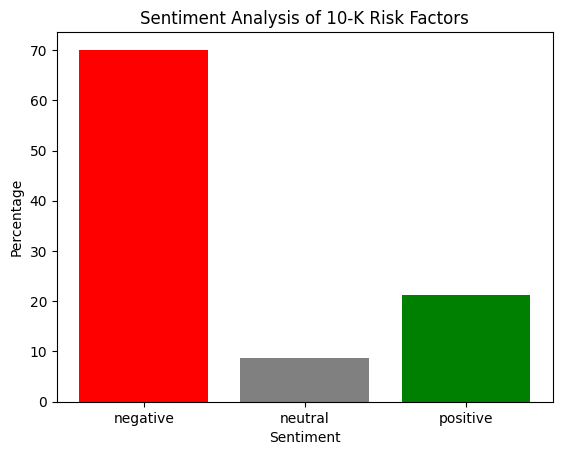

In [20]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += f"{sentence}. "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = f"{sentence}. "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Explicitly order the sentiments and assign colors
    ordered_labels = ["negative", "neutral", "positive"]
    ordered_values = [percentage.get(label, 0) for label in ordered_labels]
    ordered_colors = ["red", "gray", "green"]  # red for negative, gray for neutral, green for positive

    # Plot sentiment results
    plt.bar(ordered_labels, ordered_values, color=ordered_colors)
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 7 not found.")

# FinBERT Airbnb 2021

In [21]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("f8d767868373a8f436bdf3f4eace60095f689a92deb67a896f45895d15a0e497")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972022000006/abnb-20211231.htm"


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included elsewhere in this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2021 refer to the year ended December 31, 2021, references to 2020 refer to the year ended December 31, 2020, and 

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use 0


Sentiment Distribution: {'positive': 28.72, 'negative': 57.98, 'neutral': 13.3}


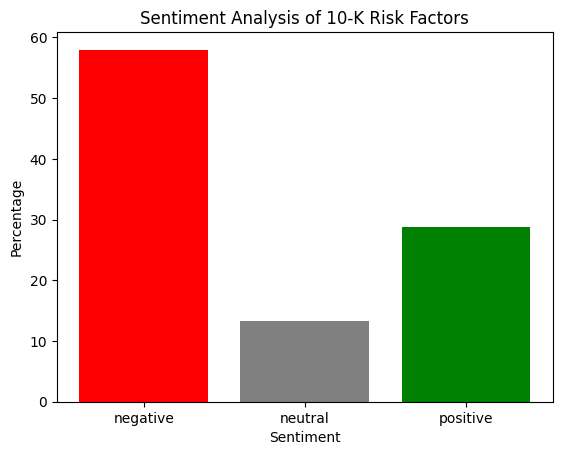

In [22]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += f"{sentence}. "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = f"{sentence}. "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Explicitly order the sentiments and assign colors
    ordered_labels = ["negative", "neutral", "positive"]
    ordered_values = [percentage.get(label, 0) for label in ordered_labels]
    ordered_colors = ["red", "gray", "green"]  # red for negative, gray for neutral, green for positive

    # Plot sentiment results
    plt.bar(ordered_labels, ordered_values, color=ordered_colors)
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 7 not found.")

# FinBERT Airbnb 2020

In [23]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("f8d767868373a8f436bdf3f4eace60095f689a92deb67a896f45895d15a0e497")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972021000010/airbnb-10k.htm"


# Extract Section 7 "Management's Discussion and Analysis of Financial Condition and Results of Operations"
section_text = extractorApi.get_section(filing_url, "7", "text")
print(section_text)

 Item 7. Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations 

You should read the following discussion and analysis of our financial condition and results of operations together with our consolidated financial statements and related notes included elsewhere in this Annual Report on Form 10-K. This discussion contains forward-looking statements based upon current expectations that involve risks and uncertainties. Our actual results may differ materially from those anticipated in these forward-looking statements as a result of various factors, including those set forth under the section titled &#8220;Risk Factors&#8221; or in other parts of this Annual Report on Form 10-K. Our historical results are not necessarily indicative of the results that may be expected for any period in the future. Except as otherwise noted, all references to 2020 refer to the year ended December 31, 2020, references to 2019 refer to the year ended December 31, 2019, and 

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use 0


Sentiment Distribution: {'positive': 36.18, 'neutral': 39.84, 'negative': 23.98}


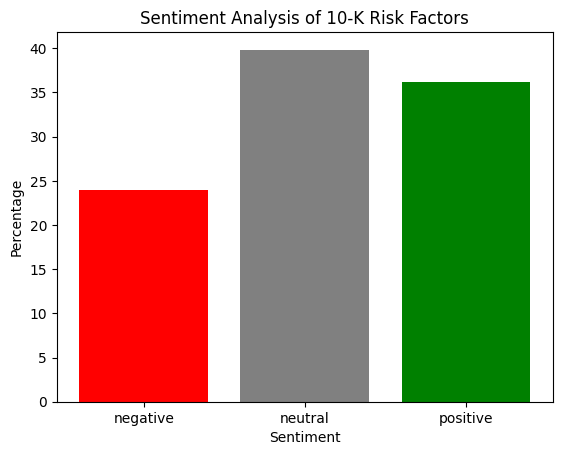

In [24]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += f"{sentence}. "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = f"{sentence}. "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Explicitly order the sentiments and assign colors
    ordered_labels = ["negative", "neutral", "positive"]
    ordered_values = [percentage.get(label, 0) for label in ordered_labels]
    ordered_colors = ["red", "gray", "green"]  # red for negative, gray for neutral, green for positive

    # Plot sentiment results
    plt.bar(ordered_labels, ordered_values, color=ordered_colors)
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 7 not found.")